In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def repair_date(val):    
    return datetime.strptime(val, '%b %d, %Y')

def repair_price(val):
    return float(val.replace(',',''))

In [3]:
# https://www.investing.com/crypto/bitcoin/btc-usd-historical-data

In [4]:
df = pd.read_csv('Bitcoin Historical Data - Investing.com.csv')
perv_columns = df.columns
df['date'] = df.Date.apply(repair_date)
df['price'] = df.Price.apply(repair_price)
df.drop([c for c in perv_columns], axis = 1, inplace = True)
df.sort_values(by=['date'], ascending=True, inplace = True)
df = pd.DataFrame(df[df.date >= datetime.strptime(str(df.date.min().year + 1), '%Y')])
df = pd.DataFrame(df[df.date < datetime.strptime(str(df.date.max().year), '%Y')])
print(df.head(2))
print('data')
print('from:', df.date.min())
print('to:', df.date.max())

           date  price
3728 2011-01-01    0.3
3727 2011-01-02    0.3
data
from: 2011-01-01 00:00:00
to: 2020-12-31 00:00:00


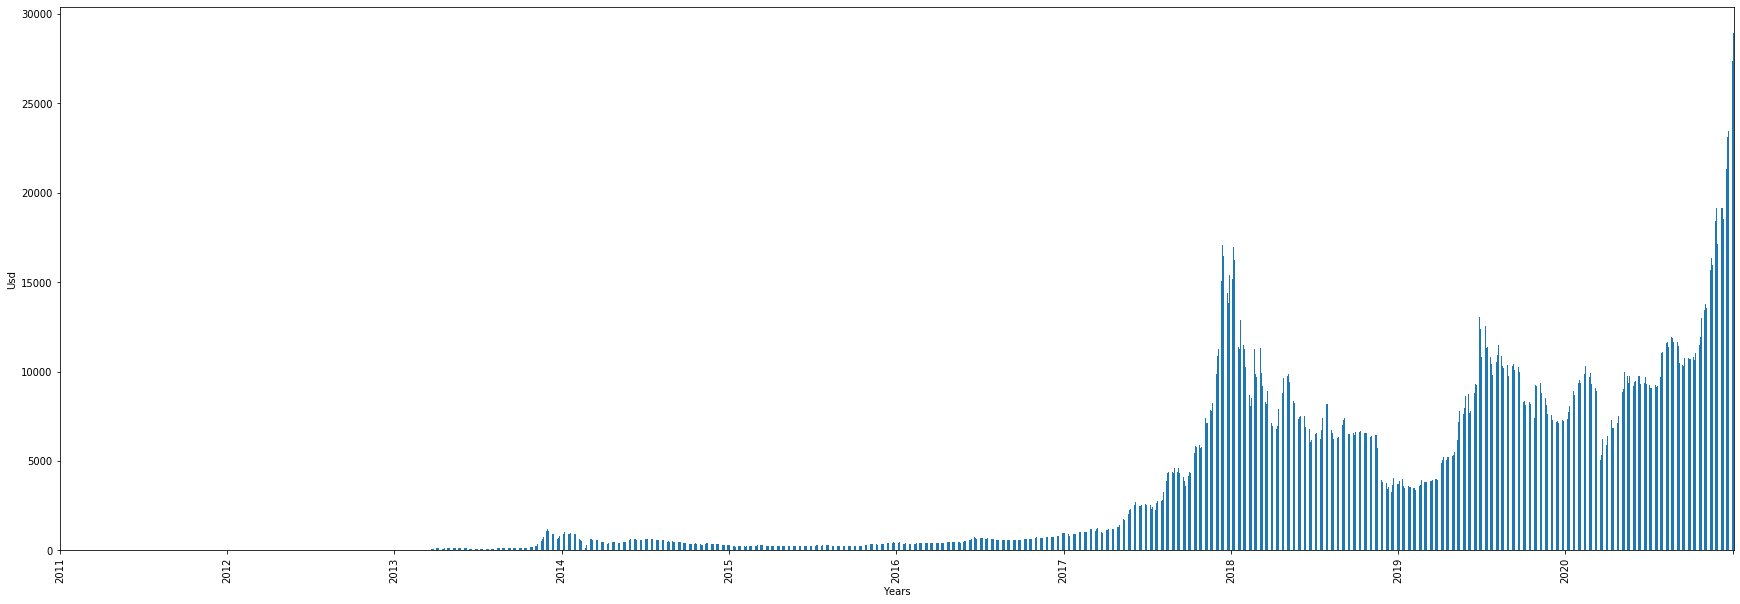

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.price.T.plot(kind='bar', figsize=(30,10))
plt.ylabel('Usd')
plt.xlabel('Years')
ax.set_xticks(range(0, len(df), 365))
ax.set_xticklabels([str(i) for i in range(df.date.min().year, df.date.max().year + 1)])
plt.show()

### First 10% profit awaiting period

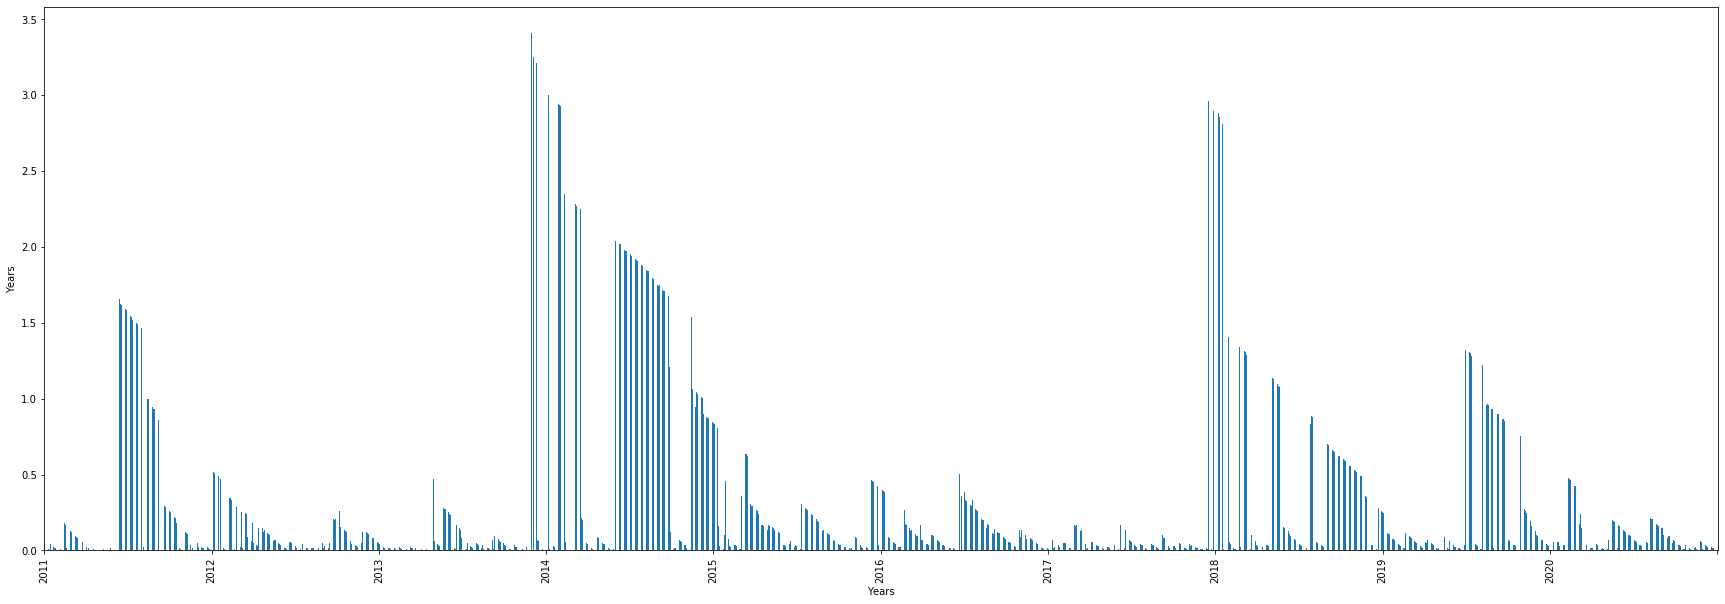

In [6]:
investment_usd = 100
profit_expected = 0.1 # 10%
profit_expected += 1
first_profit_period = np.zeros(len(df))
for i in range(len(df)):
    investment_price = df.price.iloc[i]
    investment_cc = investment_usd / investment_price
    target_usd = investment_usd * profit_expected
    for k in range(i, len(df)):
        if investment_cc * df.price.iloc[k] >= target_usd:
            first_profit_period[i] = (df.date.iloc[k] - df.date.iloc[i]).days / 365            
            break
df['first_profit_period'] = first_profit_period
fig = plt.figure()
ax = fig.add_subplot(111)
df.first_profit_period.T.plot(kind='bar', figsize=(30, 10))
plt.ylabel('Years')
plt.xlabel('Years')
ax.set_xticks(range(0, len(df), 365))
ax.set_xticklabels([str(i) for i in range(df.date.min().year, df.date.max().year + 1)])
plt.show()

### Maximum lost period

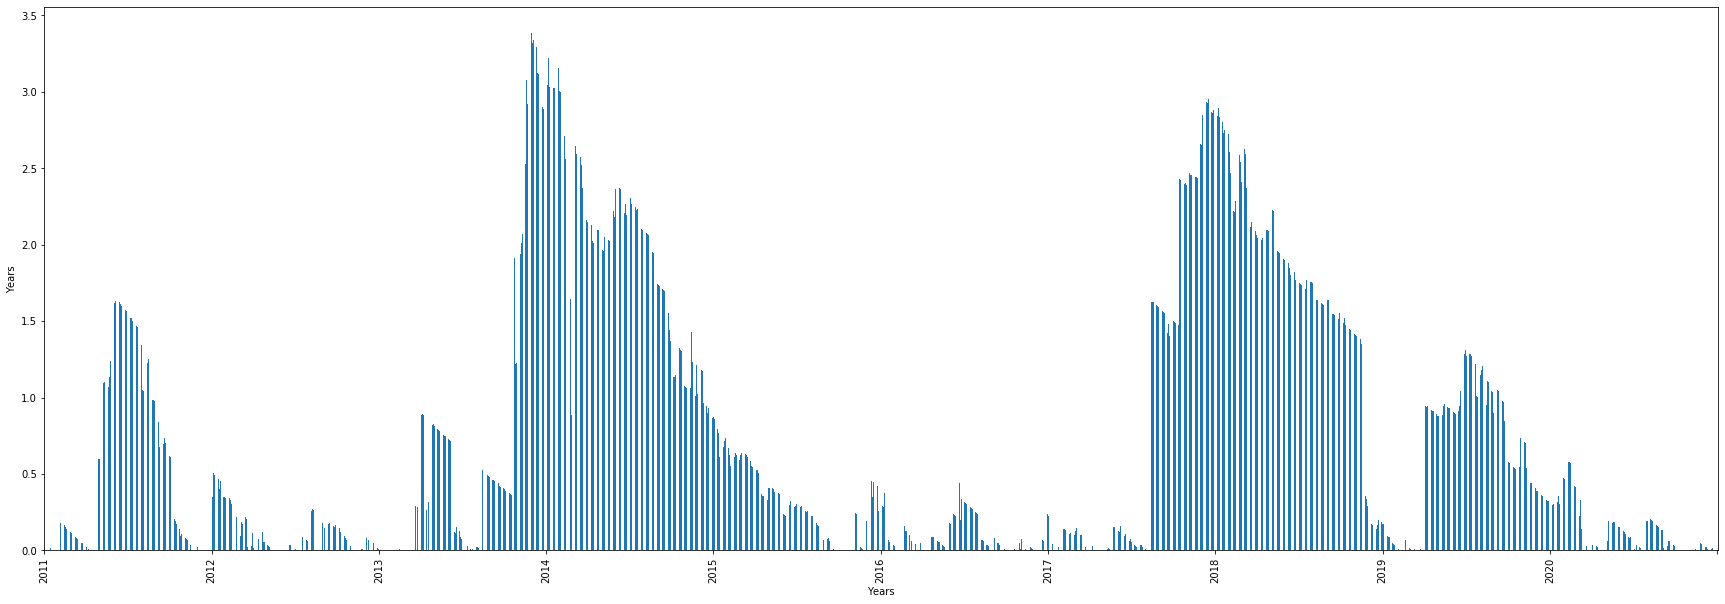

In [7]:
last_lost_period = np.zeros(len(df))
for i in range(len(df)):
    investment_price = df.price.iloc[i]
    last_lost_date = df.date.iloc[i]
    for k in range(i, len(df)):
        if investment_price > df.price.iloc[k]:
            last_lost_date = df.date.iloc[k]
    last_lost_period[i] = (last_lost_date - df.date.iloc[i]).days / 365
df['last_lost_period'] = last_lost_period
fig = plt.figure()
ax = fig.add_subplot(111)
df.last_lost_period.T.plot(kind='bar', figsize=(30, 10))
plt.ylabel('Years')
plt.xlabel('Years')
ax.set_xticks(range(0, len(df), 365))
ax.set_xticklabels([str(i) for i in range(df.date.min().year, df.date.max().year + 1)])
plt.show()